<a href="https://colab.research.google.com/github/AndreMasalle/Project_Analisis_Algoritma/blob/master/Tubes_AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplikasi algoritma

In [10]:
!pip install networkx matplotlib python-louvain

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request
import gzip
import shutil
import community as community_louvain
from time import time


In [12]:
url = 'https://snap.stanford.edu/data/twitter_combined.txt.gz'
output_path = '/content/twitter_combined.txt.gz'
urllib.request.urlretrieve(url, output_path)

with gzip.open(output_path, 'rb') as f_in:
    with open('/content/twitter_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Masukin data ke dalam graph
G = nx.read_edgelist('/content/twitter_combined.txt', create_using=nx.DiGraph())

# Informasi dasar dari nodes sama edgenya
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")
print(f"Beberapa node teratas: {list(G.nodes)[:10]}")

Jumlah node: 81306
Jumlah edge: 1768149
Beberapa node teratas: ['214328887', '34428380', '17116707', '28465635', '380580781', '18996905', '221036078', '153460275', '107830991', '17868918']


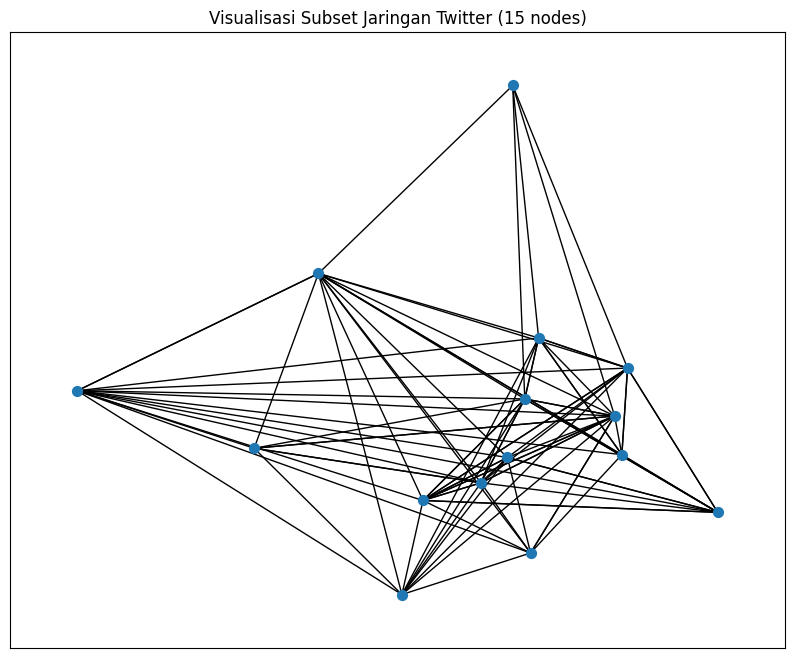

In [13]:
sample_nodes = list(G.nodes)[:15]
subG = G.subgraph(sample_nodes)

plt.figure(figsize=(10, 8))
nx.draw_networkx(subG, node_size=50, with_labels=False, arrows=False)
plt.title("Visualisasi Subset Jaringan Twitter (15 nodes)")
plt.show()


## Pagerank

In [16]:
# Hitung PageRank
pagerank = nx.pagerank(G)
top_10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("10 node dengan PageRank tertinggi:", top_10_pagerank)



10 node dengan PageRank tertinggi: [('115485051', 0.004330506698230428), ('116485573', 0.004133153508485283), ('813286', 0.002338682221137342), ('40981798', 0.0013717327204545624), ('7861312', 0.0012537143109991912), ('11348282', 0.0012218585112347908), ('17093617', 0.0010755956732481922), ('15439395', 0.0010306793143792805), ('18396070', 0.0010286404459628527), ('14230524', 0.0010138727304559434)]


## Louvain


Ngeprosesnya terlalu lama, paling lama yang tercatat adalah 1 jam menggunakan seluruh data dan T4 GPU. Beberapa cara buat akalin ini:
- Resampling
- Ganti runtime type

In [6]:
# Deteksi komunitas
partition = community_louvain.best_partition(G.to_undirected())

# Visualisasi komunitas
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('tab20', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Visualisasi Komunitas dengan Louvain")
plt.show()

KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>